In [7]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Importing Libraries
from pandas.api.types import CategoricalDtype
import pandas as pd
import numpy as np

from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, auc, mean_squared_error, average_precision_score, confusion_matrix, f1_score, precision_score, precision_recall_curve, recall_score
from sklearn.metrics import roc_curve, mean_absolute_error, r2_score, classification_report, ConfusionMatrixDisplay
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from IPython.display import Image
import warnings  
import graphviz 
import pydotplus
import seaborn as sns        

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
import joblib

from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import svm
from sklearn.svm import SVR, SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn import metrics

pd.set_option('display.max_columns', None)

#Setting warning filters
import warnings

# **Data preparation**

In [9]:
df = pd.read_csv('/content/drive/MyDrive/OnlineNewsPopularity.csv')                                 
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [10]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.0

In [11]:
df.shape

(39644, 61)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [13]:
df.isna().sum()

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

In [14]:
df.dropna(inplace=True)

(array([3.9563e+04, 6.0000e+01, 1.1000e+01, 4.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.000000e+00, 8.433090e+04, 1.686608e+05, 2.529907e+05,
        3.373206e+05, 4.216505e+05, 5.059804e+05, 5.903103e+05,
        6.746402e+05, 7.589701e+05, 8.433000e+05]),
 <BarContainer object of 10 artists>)

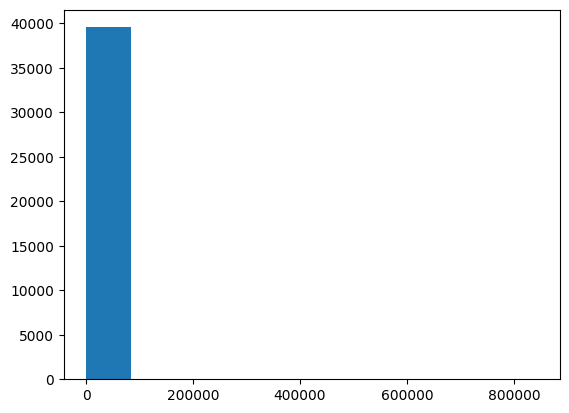

In [15]:
counts, bins = np.histogram(df[' shares'])

plt.hist(bins[:-1], bins, weights=counts)


{'whiskers': [<matplotlib.lines.Line2D at 0x7f0ad9176e20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0ad91863a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0ad9176b80>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0ad91868e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0ad9186b80>],
 'means': []}

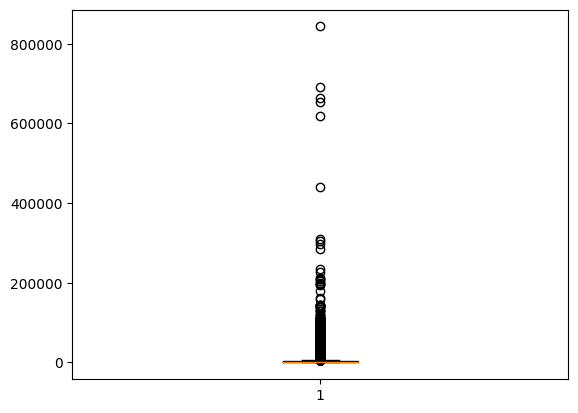

In [16]:
plt.boxplot(df[' shares']) 

The 75% of the samples have shares lower than 2800 and from the graphs above, there are some outliers with shares, so we excluded the samples with shares more than 30000.


In [17]:
#df1=df[df[' shares']<3000]
#df1.describe()
df1 = df

In [18]:
df2=df1.drop(['url',' timedelta'],axis=1) # deleteing unnessary columns

In [19]:
df2[' shares'].median()
df2.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [20]:
# Dividing the shares into 2 types by median to create the classification machine learnining model

def assign_y(row):
  if row[' shares']<=1400:
    y=0
  else :
    y=1 
  return y

df3 = df2
df3['y'] = df3.apply (lambda row: assign_y(row), axis=1)
df4 = df3.drop([' shares'],axis=1)

df4.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,y
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0


In [21]:
print('Raw: ', df.shape)
print('Cleaned: ', df4.shape)

Raw:  (39644, 61)
Cleaned:  (39644, 59)


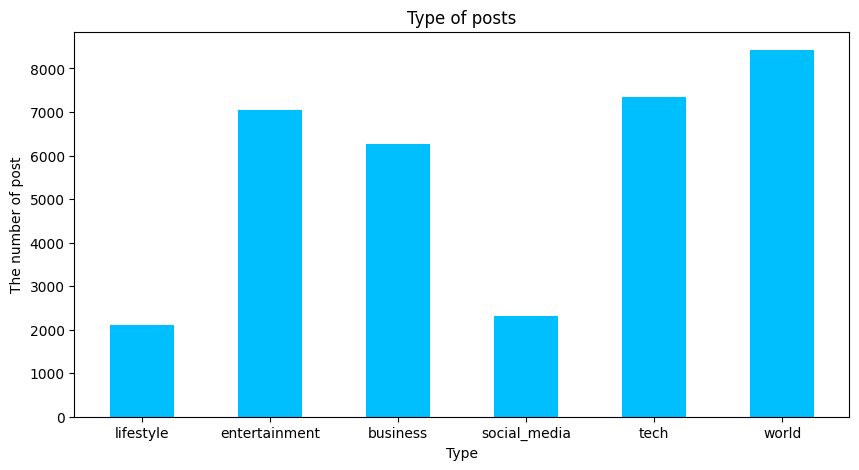

In [22]:
lifestyle = sum(df4[' data_channel_is_lifestyle'])
entertainment = sum(df4[' data_channel_is_entertainment'])
business = sum(df4[' data_channel_is_bus'])
social_media = sum(df4[' data_channel_is_socmed'])
tech = sum(df4[' data_channel_is_tech'])
world = sum(df4[' data_channel_is_world'])
other = df4[df4[' data_channel_is_lifestyle'] == 0]
post_type = {'lifestyle': lifestyle, 'entertainment': entertainment, 'business': business, 'social_media': social_media, 'tech': tech, 'world': world}

df = df[df[' n_tokens_content'] != 0]

pt = list(post_type.keys())
values = list(post_type.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(pt, values, color ='deepskyblue', width = 0.5)
 
plt.xlabel("Type")
plt.ylabel("The number of post")
plt.title("Type of posts")
plt.show()

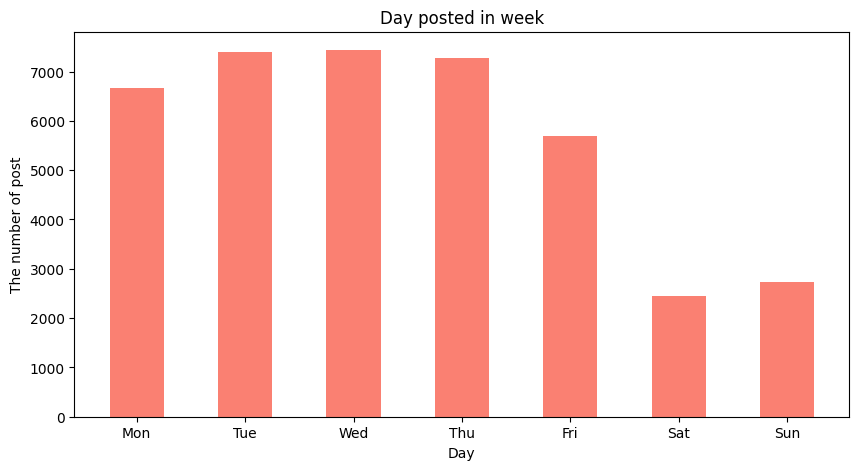

In [23]:
Mon = sum(df4[' weekday_is_monday'])
Tue = sum(df4[' weekday_is_tuesday'])
Wed = sum(df4[' weekday_is_wednesday'])
Thu = sum(df4[' weekday_is_thursday'])
Fri = sum(df4[' weekday_is_friday'])
Sat = sum(df4[' weekday_is_saturday'])
Sun = sum(df4[' weekday_is_sunday'])

Day = {'Mon': Mon, 'Tue': Tue, 'Wed': Wed, 'Thu': Thu, 'Fri': Fri, 'Sat': Sat, 'Sun': Sun}



days = list(Day.keys())
values = list(Day.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(days, values, color ='salmon', width = 0.5)
 
plt.xlabel("Day")
plt.ylabel("The number of post")
plt.title("Day posted in week")
plt.show()

In [24]:
Y=df4['y'].values
X=df4[df4.columns.drop(['y'])].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y,random_state=123) # 70% training and 30% test

In [25]:
df4['y'].value_counts()

0    20082
1    19562
Name: y, dtype: int64

# **Decision Tree Classifier**

In [26]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, max_features=None, 
                             )
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
pred=clf.predict(X_test)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.58      0.59      0.59      6025
           1       0.57      0.55      0.56      5869

    accuracy                           0.57     11894
   macro avg       0.57      0.57      0.57     11894
weighted avg       0.57      0.57      0.57     11894



In [29]:
param_grid = {'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth': [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],'max_features':["sqrt", "log2"]}

In [30]:
clf=DecisionTreeClassifier()
dtree_gscv = GridSearchCV(clf, param_grid, cv=5)
dtree_gscv.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [31]:
dtree_gscv.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'log2',
 'splitter': 'best'}

In [32]:
clf = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=10, max_features='log2', 
                             )
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       splitter='random')

In [33]:
pred=clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.61      0.65      0.63      6025
           1       0.61      0.58      0.59      5869

    accuracy                           0.61     11894
   macro avg       0.61      0.61      0.61     11894
weighted avg       0.61      0.61      0.61     11894



# **Machine learning classification**

## **Baseline model: Logistic Regresstion**

In [34]:
logistic = LogisticRegression(solver='liblinear', multi_class='ovr', random_state=0)
logistic.fit(X_train, y_train)
warnings.filterwarnings('ignore')
logistic_ypred = logistic.predict(X_test)
print('The accuracy of logistic regression for training dataset is ', logistic.score(X_train, y_train))
print('The accuracy of logistic regression for testing dataset is ', logistic.score(X_test, y_test))

The accuracy of logistic regression for training dataset is  0.6
The accuracy of logistic regression for testing dataset is  0.5999663695981167


In [35]:
pred = logistic.predict_proba(X_test)

In [36]:
# Model after tuning
logistic_t = LogisticRegression(C = 1.0, solver='newton-cg', penalty = 'l2', random_state=0,max_iter=1000)
logistic_t.fit(X_train, y_train)
logistic_ypred_t = logistic_t.predict(X_test)

In [37]:
print(classification_report(y_test, logistic_ypred_t))

              precision    recall  f1-score   support

           0       0.65      0.68      0.66      6025
           1       0.65      0.62      0.64      5869

    accuracy                           0.65     11894
   macro avg       0.65      0.65      0.65     11894
weighted avg       0.65      0.65      0.65     11894



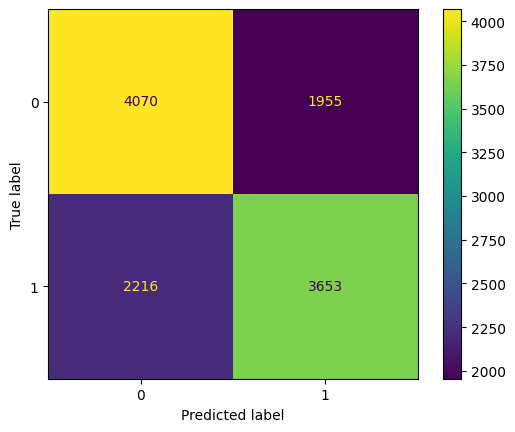

In [38]:

cm = confusion_matrix(y_test, logistic_ypred_t, labels=logistic_t.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logistic_t.classes_)
disp.plot()

## **Main model: XGboost**

In [39]:
m_xgboost = XGBClassifier(objective ='binary:logistic', max_depth=5, n_estimators=100)
m_xgboost

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [40]:
kfold = KFold()
# Perform K-Fold Cross Validation
results = cross_val_score(m_xgboost, X_train, y_train, cv=kfold)
# Print the average results
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 65.62% (0.33%)


In [41]:
m_xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

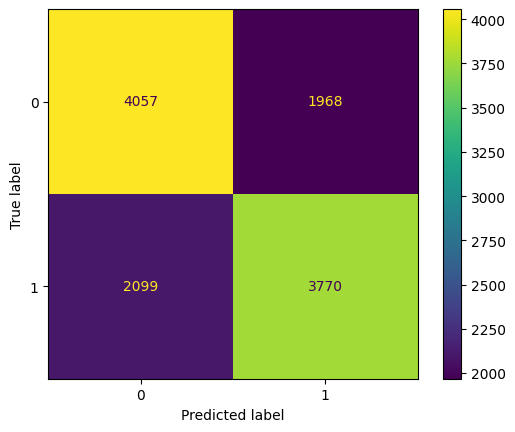

In [42]:
xg_ypred = m_xgboost.predict(X_test)
cm = confusion_matrix(y_test, xg_ypred, labels=m_xgboost.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=m_xgboost.classes_)
disp.plot()

In [43]:
# Get the classification report
print(classification_report(y_test, xg_ypred))

              precision    recall  f1-score   support

           0       0.66      0.67      0.67      6025
           1       0.66      0.64      0.65      5869

    accuracy                           0.66     11894
   macro avg       0.66      0.66      0.66     11894
weighted avg       0.66      0.66      0.66     11894



In [44]:
col = df4.columns.drop(['y'])
importance = list(m_xgboost.feature_importances_)
fea_dfxc = pd.DataFrame({'columns':col,'importance':importance})
fea_dfxc.sort_values(by=['importance'],inplace=True,ascending=False)
fea_dfxc.reset_index(drop=True,inplace=True)
# display(fea_dfxc)
fea_dfxc.head()

,columns,importance
0,data_channel_is_entertainment,0.146161
1,data_channel_is_tech,0.091254
2,is_weekend,0.075955
3,data_channel_is_socmed,0.049669
4,kw_avg_avg,0.035057


In [45]:
# Model after tunning
m_xgboost_t = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.1, learning_rate = 0.05, max_depth = 6, n_estimators = 1000)
m_xgboost_t.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.1, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

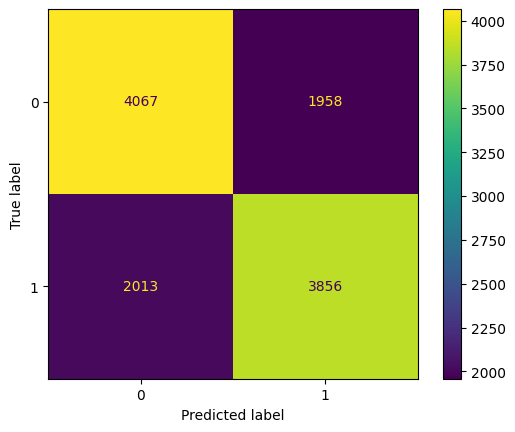

In [46]:
xg_ypred_t = m_xgboost_t.predict(X_test)
cm = confusion_matrix(y_test, xg_ypred_t, labels=m_xgboost_t.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=m_xgboost_t.classes_)
disp.plot()

In [47]:
print(classification_report(y_test, xg_ypred_t))

              precision    recall  f1-score   support

           0       0.67      0.68      0.67      6025
           1       0.66      0.66      0.66      5869

    accuracy                           0.67     11894
   macro avg       0.67      0.67      0.67     11894
weighted avg       0.67      0.67      0.67     11894



In [48]:
col = df4.columns.drop(['y'])
importance = list(m_xgboost_t.feature_importances_)
fea_dfxc = pd.DataFrame({'columns':col,'importance':importance})
fea_dfxc.sort_values(by=['importance'],inplace=True,ascending=False)
fea_dfxc.reset_index(drop=True,inplace=True)
# display(fea_dfxc)
fea_dfxc.head()

,columns,importance
0,is_weekend,0.104025
1,data_channel_is_socmed,0.066165
2,weekday_is_saturday,0.058460
3,data_channel_is_entertainment,0.055698
4,data_channel_is_world,0.047074


 
# **Naïve Bayes**


In [49]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.naive_bayes import GaussianNB
naive_class=GaussianNB()
naive_class.fit(X_train, y_train)
naive_class_pred = naive_class.predict(X_test)

In [50]:
print(accuracy_score(y_test,naive_class_pred))
print(f1_score(y_test,naive_class_pred,average=None))

0.5316966537750126
[0.67029715 0.19205106]


In [51]:
model = GaussianNB()
cv_scores = cross_val_score(model, X, Y, cv=5)

In [52]:
print("Accuracy:",accuracy_score(y_test, naive_class_pred))
print('Precision: %.3f' % precision_score(y_test, naive_class_pred))
print('Recall: %.3f' % recall_score(y_test, naive_class_pred))
print('F1 Score: %.3f' % f1_score(y_test, naive_class_pred))

Accuracy: 0.5316966537750126
Precision: 0.646
Recall: 0.113
F1 Score: 0.192


<Axes: xlabel='Predicted', ylabel='Actual'>

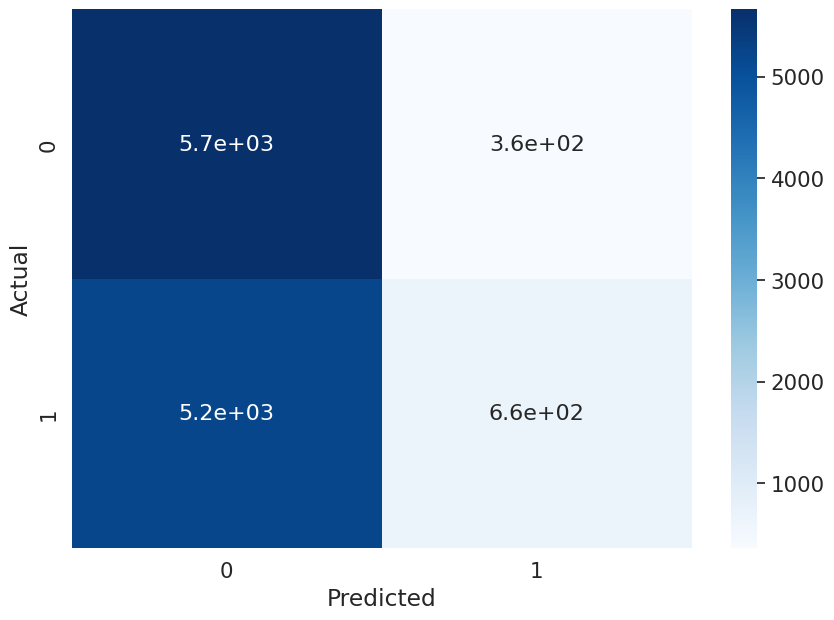

In [53]:
data = confusion_matrix(y_test,naive_class_pred)
#calculateScore(data)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

In [54]:
print(classification_report(y_test, naive_class_pred))

              precision    recall  f1-score   support

           0       0.52      0.94      0.67      6025
           1       0.65      0.11      0.19      5869

    accuracy                           0.53     11894
   macro avg       0.58      0.53      0.43     11894
weighted avg       0.58      0.53      0.43     11894



**Hyperparameter Tuning**

In [55]:
np.logspace(0,-9, num=10)

cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)

In [56]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, param_grid=params_NB, cv=cv_method,verbose=1,scoring='accuracy')
Data_transformed = PowerTransformer().fit_transform(X_test)
gs_NB.fit(Data_transformed, y_test);

results_NB = pd.DataFrame(gs_NB.cv_results_['params'])

results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
accuracy_score on test dataset :  0.6212375987893055


In [57]:
#model after tuning
naive_class_t=gs_NB
naive_class_t.fit(X_train, y_train)
naive_class_pred_t = naive_class_t.predict(X_test)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [58]:
print(accuracy_score(y_test,naive_class_pred_t))
print(f1_score(y_test,naive_class_pred_t,average=None))

0.5527156549520766
[0.67217156 0.2962963 ]


<Axes: xlabel='Predicted', ylabel='Actual'>

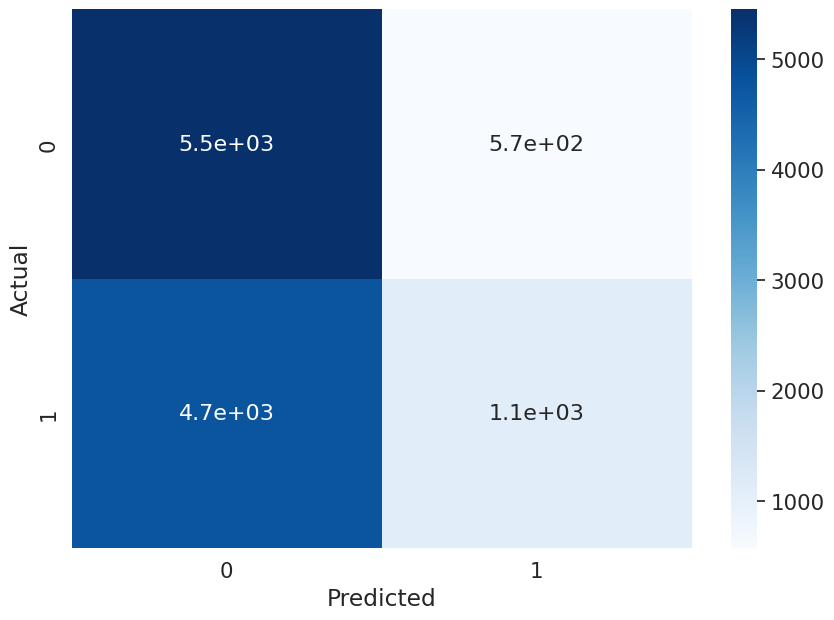

In [59]:
data = confusion_matrix(y_test,naive_class_pred_t)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

In [60]:
print(classification_report(y_test, naive_class_pred_t))

              precision    recall  f1-score   support

           0       0.53      0.91      0.67      6025
           1       0.66      0.19      0.30      5869

    accuracy                           0.55     11894
   macro avg       0.60      0.55      0.48     11894
weighted avg       0.60      0.55      0.49     11894



# **KNN**

In [61]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [62]:
print(accuracy_score(y_test,knn_pred))
print(f1_score(y_test,knn_pred,average=None))

0.5707919959643518
[0.62734506 0.49400337]


<Axes: xlabel='Predicted', ylabel='Actual'>

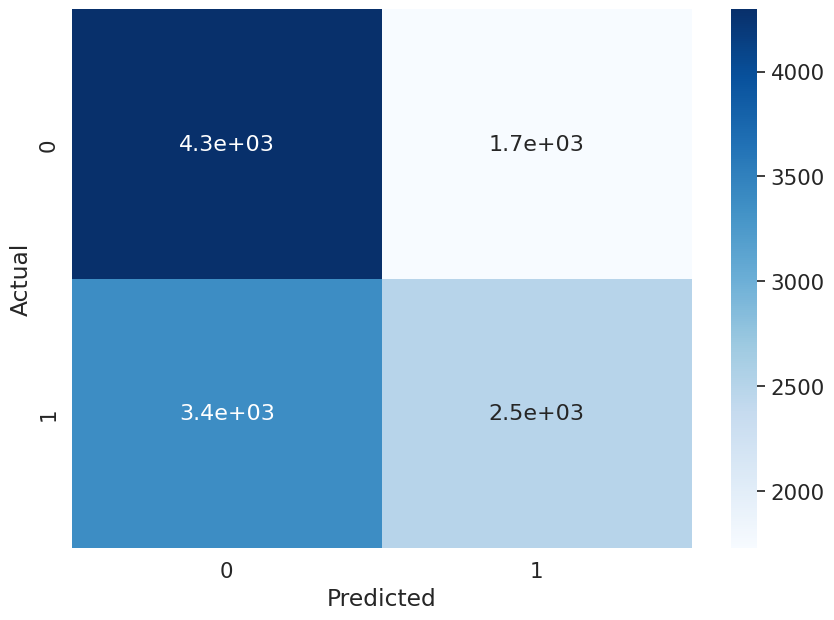

In [63]:
data = confusion_matrix(y_test,knn_pred)

df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

In [64]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.56      0.71      0.63      6025
           1       0.59      0.42      0.49      5869

    accuracy                           0.57     11894
   macro avg       0.58      0.57      0.56     11894
weighted avg       0.58      0.57      0.56     11894



**Hyperparameter tunning**

In [65]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [66]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [67]:
# fit the model on our train set
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [68]:
# find the best score
g_res.best_score_

0.5798558558558559

In [69]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}

In [70]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute')

In [71]:
# get a prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

In [72]:
#Model after tuning
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [73]:
print(accuracy_score(y_test,y_knn))
print(f1_score(y_test,y_knn,average=None))

0.5652429796536068
[0.58207387 0.54699956]


<Axes: xlabel='Predicted', ylabel='Actual'>

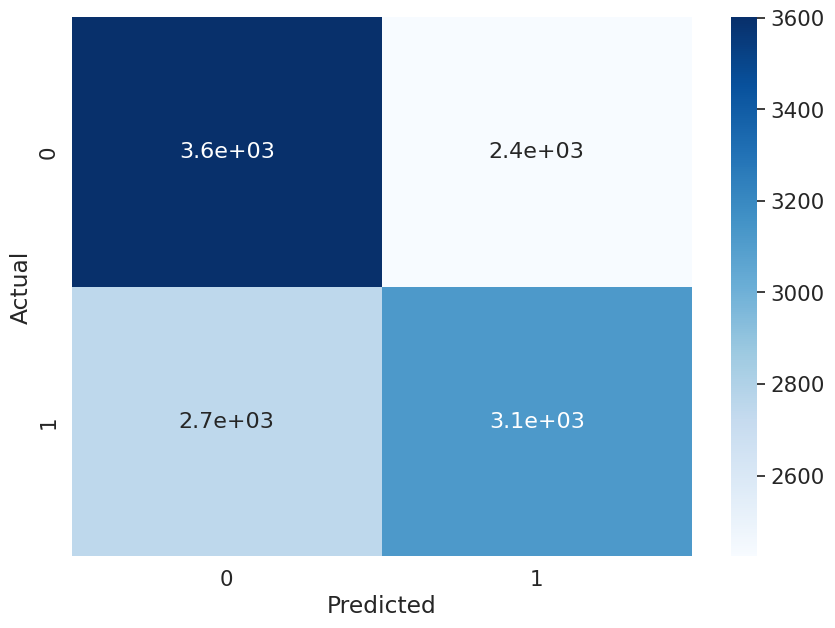

In [74]:
data = confusion_matrix(y_test,y_knn)
#calculateScore(data)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

In [75]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.56      0.71      0.63      6025
           1       0.59      0.42      0.49      5869

    accuracy                           0.57     11894
   macro avg       0.58      0.57      0.56     11894
weighted avg       0.58      0.57      0.56     11894

